## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [37]:
# sampling distribution
# what range of different sample we can get by different population
# design a function
def sample(brown, n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) <brown, 'Brown', 'Green')})

In [38]:
s=sample(0.51, n=1000)

In [39]:
s.vote.value_counts(normalize=True)

Brown    0.53
Green    0.47
Name: vote, dtype: float64

In [40]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [41]:
dist.head()

,Brown,Green
vote,0.533,0.467
vote,0.547,0.453
vote,0.532,0.468
vote,0.513,0.487
vote,0.528,0.472


<AxesSubplot:>

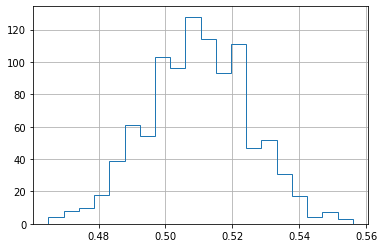

In [42]:
dist.Brown.hist(histtype='step',bins=20)

In [43]:
# Confidence Interval: Describes the uncertinty of the inference by giving us a range such as 95% of the times
# the range would include the true value.
# 95% is the confidence level, and we can choose it as we want


# simulating 
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [44]:
# 95% confidence interval
def quantiles(brown, n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [45]:
quantiles(0.50)

(0.479, 0.540025)

In [46]:
quantiles(0.49)

(0.478, 0.539)

In [47]:
quantiles(0.54)

(0.48097499999999993, 0.54)

In [48]:
# 95% confidence interval: [0.48, 0.54]
# Estimate = 0.51 +- 0.03 (qt 95% confidence)
# 0.51 = Point estimate
# 0.03 = Margin of error

In [49]:
dist = samplingdist(0.50,10000)

<AxesSubplot:>

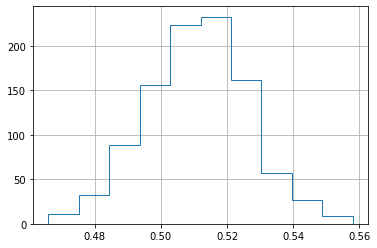

In [50]:
dist.Brown.hist(histtype='step')

In [51]:
largepoll = pd.read_csv('poll-larger.csv')

In [52]:
largepoll.vote.value_counts()

Green    5181
Brown    4819
Name: vote, dtype: int64